<a href="https://colab.research.google.com/github/Edgar-Tinoco/probabilidad/blob/main/unidad6/probabilidad_U6_PROYECTO_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Probabilidad y Estadistica Grupo 2Y
#Proyecto Final: Análisis Estadístico de Datos COVID-19 En Python
##Unidad 6: Estadistica descriptiva aplicada
##Martes 25 de noviembre del 2025.
###Maestro: José Gabriel Rodriguez Rivas
###integrantes equipo:
*Marcela Perez Gurrola; 25040150

*Leonel Alberto Ontiveros Vera; 25040147

*Edgar Giovanni Tinoco Nava; 25040151

objetivo de la practica: aplicar los conceptos de probabilidad y estadistica utilizando python para realizar un analisis descriptivo y visual de datos sobre los casos de COVID-19.

ESPECIFICACIONES DEL PROYECTO
1.   Formato del archivo
2.   portada en el notebook
3.   contenido de analisis y estadistica descriptiva
4.   probabilidades por comorbilidad e interpretacion estadistica
5.   ejercicio de distribucion normal
6.   bloques adicionales obligatoriios(interpretacion general de resultados)
7.   requisitos tecnicos  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
pd.options.display.max_columns = 200

file_path = "/content/covid2020-2021-codificado.csv"

df = pd.read_csv(file_path, low_memory=False)
print("Dataframe cargado. Forma y primeras columnas:")
print(df.shape)
print(df.columns)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataframe cargado. Forma y primeras columnas:
(12634194, 21)
Index(['SECTOR', 'SEXO', 'ENTIDAD_NAC', 'TIPO_PACIENTE', 'FECHA_INGRESO',
       'FECHA_DEF', 'INTUBADO', 'NEUMONIA', 'EDAD', 'EMBARAZO', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'HIPERTENSION', 'CARDIOVASCULAR',
       'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO', 'RESULTADO_ANTIGENO', 'UCI'],
      dtype='object')


In [ ]:
if 'FECHA_DEF' in df.columns:
    display(df['FECHA_DEF'].head(20))
else:
    print("La columna 'FECHA_DEF' no existe en este dataset.")

,FECHA_DEF
0,9999-99-99
1,9999-99-99
2,9999-99-99
3,9999-99-99
4,9999-99-99
5,9999-99-99
6,9999-99-99
7,9999-99-99
8,9999-99-99
9,9999-99-99


In [ ]:
#ESTADISTICA DESCRIPTIVA
import numpy as np

print("=== RESULTADO_ANTIGENO (positivos/negativos/indeterminados) ===")
if 'RESULTADO_ANTIGENO' in df.columns:
    display(df['RESULTADO_ANTIGENO'].value_counts(dropna=False))
else:
    print("No se encontró 'RESULTADO_ANTIGENO'.")

print("\n=== TIPO_PACIENTE (hospitalizado vs ambulatorio) ===")
if 'TIPO_PACIENTE' in df.columns:
    display(df['TIPO_PACIENTE'].value_counts(dropna=False))
else:
    print("No se encontró 'TIPO_PACIENTE'.")

print("\n=== EMBARAZO ===")
if 'EMBARAZO' in df.columns:
    display(df['EMBARAZO'].value_counts(dropna=False))
else:
    print("No se encontró 'EMBARAZO'.")

print("\n=== INDIGENA ===")
if 'INDIGENA' in df.columns:
    display(df['INDIGENA'].value_counts(dropna=False))
else:
    print("No se encontró 'INDIGENA'.")


=== RESULTADO_ANTIGENO (positivos/negativos/indeterminados) ===


,count
RESULTADO_ANTIGENO,
Negativo,5853547
Pendiente,5005939
Positivo,1774708



=== TIPO_PACIENTE (hospitalizado vs ambulatorio) ===


,count
TIPO_PACIENTE,
Ambulatorio,11543303
Hospitalizado,1090891



=== EMBARAZO ===


,count
EMBARAZO,
No,6483614
No aplica,5985456
Si,122583
Se ignora,42529
No especificado,12



=== INDIGENA ===


,count
INDIGENA,
NaN,8765798
No,3665974
No especificado,167182
Si,35240


In [ ]:
# Importacion de librerías para gráficos
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

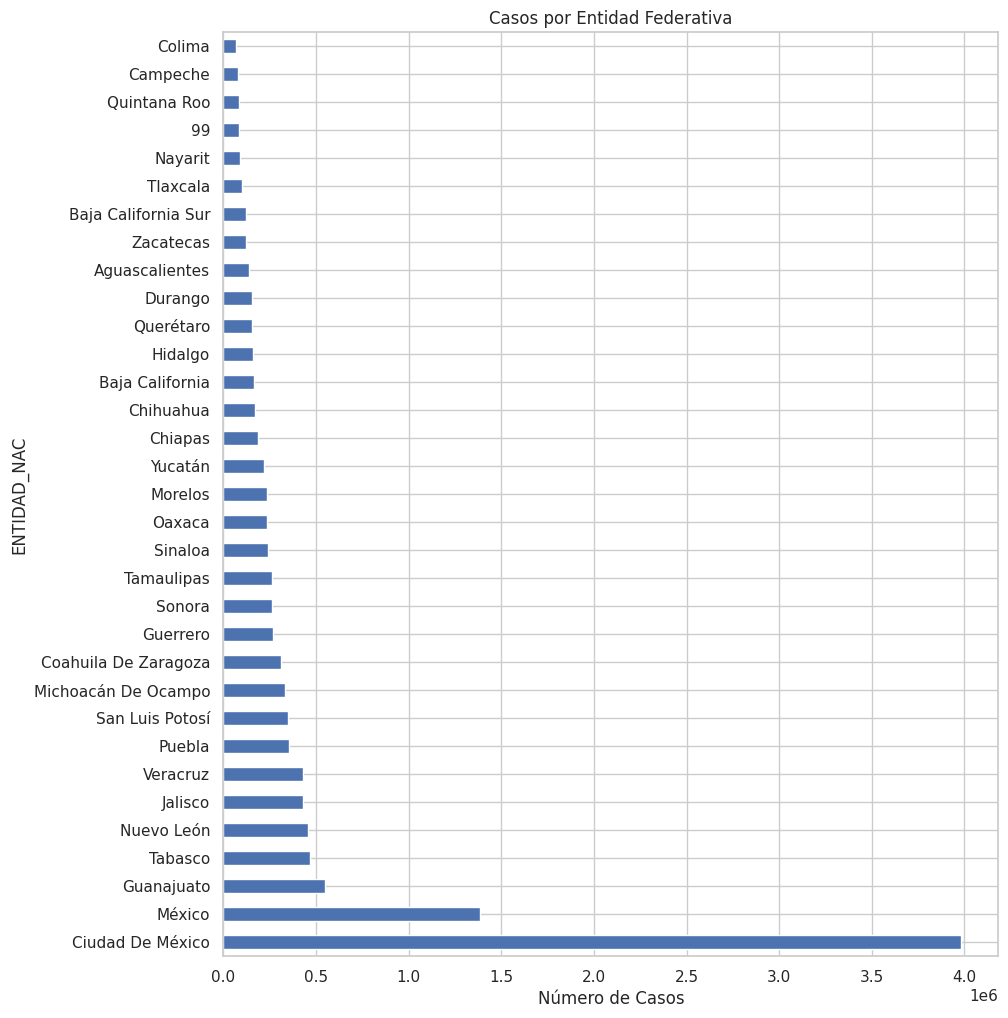

In [ ]:
plt.figure(figsize=(10,12))
df["ENTIDAD_NAC"].value_counts().plot(kind="barh")
plt.title("Casos por Entidad Federativa")
plt.xlabel("Número de Casos")
plt.show()

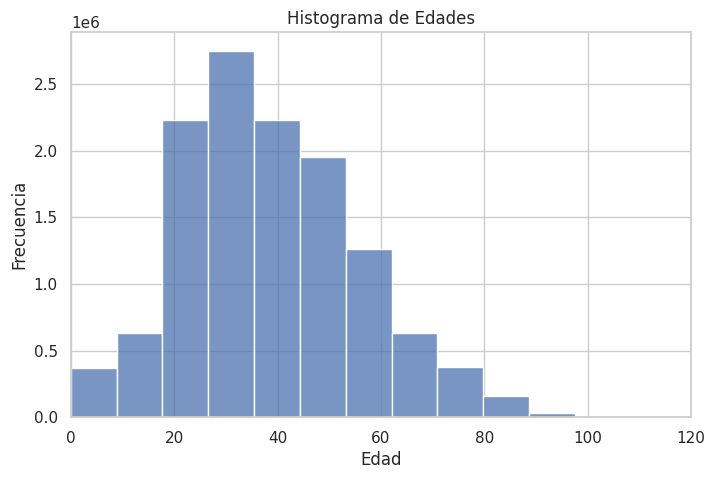

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["EDAD"], bins=30)
plt.xlim(0,120)
plt.title("Histograma de Edades")
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

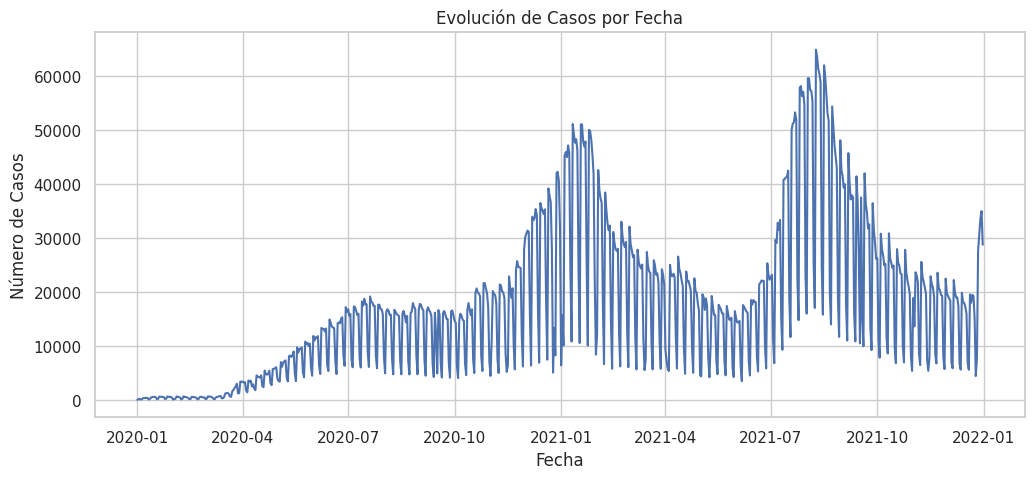

In [ ]:
df["FECHA_INGRESO"] = pd.to_datetime(df["FECHA_INGRESO"], errors="coerce")
daily = df.groupby("FECHA_INGRESO").size()
plt.figure(figsize=(12,5))
plt.plot(daily.index, daily.values)
plt.title("Evolución de Casos por Fecha")
plt.xlabel("Fecha")
plt.ylabel("Número de Casos")
plt.show()

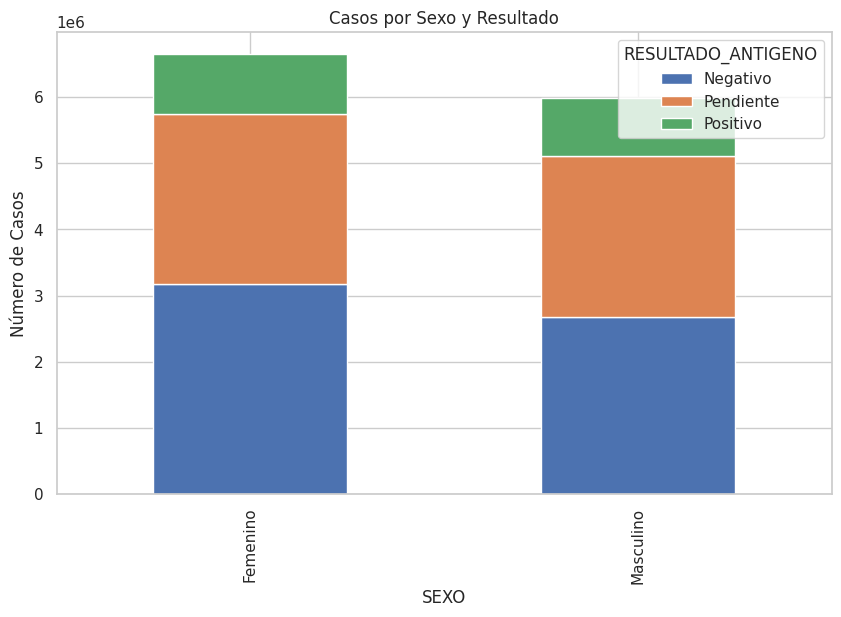

In [ ]:
table = df.groupby(["SEXO","RESULTADO_ANTIGENO"]).size().unstack(fill_value=0)

table.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Casos por Sexo y Resultado")
plt.ylabel("Número de Casos")
plt.show()

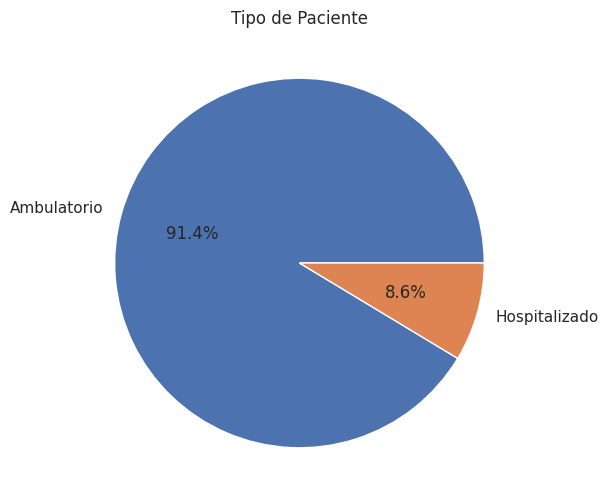

In [ ]:
df["TIPO_PACIENTE"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(6,6))
plt.title("Tipo de Paciente")
plt.ylabel("")
plt.show()

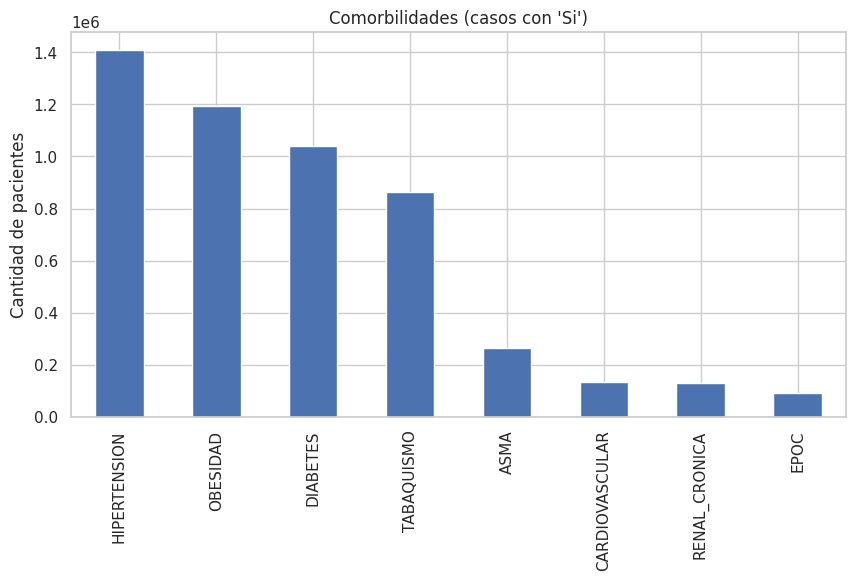

,0
HIPERTENSION,1407779
OBESIDAD,1193021
DIABETES,1038459
TABAQUISMO,865162
ASMA,263855
CARDIOVASCULAR,134410
RENAL_CRONICA,129874
EPOC,92446


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

comorb = ["DIABETES","HIPERTENSION","OBESIDAD","EPOC","ASMA",
          "RENAL_CRONICA","CARDIOVASCULAR","TABAQUISMO"]

# Función que detecta "Si"
def es_si(columna):
    return columna.astype(str).str.strip().str.upper() == "SI"


comorb_counts = df[comorb].apply(lambda c: es_si(c).sum())

plt.figure(figsize=(10,5))
comorb_counts.sort_values(ascending=False).plot(kind='bar')
plt.title("Comorbilidades (casos con 'Si')")
plt.ylabel("Cantidad de pacientes")
plt.show()
display(comorb_counts.sort_values(ascending=False))

In [ ]:
# PROBABILIDAD SIMPLE
total = len(df)
print("Total registros:", total)

if len(comorb) > 0:
    prob_simple = (df[comorb].apply(lambda c: es_si(c).sum()) / total).rename('probabilidad_simple')
    display(prob_simple.sort_values(ascending=False))
else:
    print('No se detectaron comorbilidades para calcular probabilidad simple.')

Total registros: 12634194


,probabilidad_simple
HIPERTENSION,0.111426
OBESIDAD,0.094428
DIABETES,0.082194
TABAQUISMO,0.068478
ASMA,0.020884
CARDIOVASCULAR,0.010639
RENAL_CRONICA,0.010280
EPOC,0.007317


In [ ]:
comorb = ["DIABETES","HIPERTENSION","OBESIDAD","EPOC","ASMA",
          "RENAL_CRONICA","CARDIOVASCULAR","TABAQUISMO"]

# Función que detecta "Si"
def es_si(col):
    return col.astype(str).str.strip().str.upper() == "SI"


prob_cond = pd.DataFrame()

for c in comorb:
    prob_cond[c] = df.groupby("ENTIDAD_NAC")[c].apply(lambda g: es_si(g).sum() / len(g))

prob_cond

#99 no aplica/no especificado/se ignora

,DIABETES,HIPERTENSION,OBESIDAD,EPOC,ASMA,RENAL_CRONICA,CARDIOVASCULAR,TABAQUISMO
ENTIDAD_NAC,,,,,,,,
99,0.024336,0.051137,0.041635,0.003881,0.026893,0.003075,0.008661,0.048488
Aguascalientes,0.075668,0.116701,0.104301,0.008908,0.025213,0.015654,0.012263,0.076362
Baja California,0.085036,0.142559,0.141031,0.008029,0.036818,0.009723,0.015193,0.070610
Baja California Sur,0.071792,0.110704,0.125715,0.003259,0.028926,0.007188,0.010464,0.055060
Campeche,0.087880,0.124905,0.136157,0.006973,0.026991,0.010401,0.010375,0.044391
Chiapas,0.082385,0.108598,0.092030,0.006587,0.021143,0.010859,0.010039,0.040769
Chihuahua,0.105604,0.164451,0.120974,0.012001,0.031978,0.013877,0.018733,0.085999
Ciudad De México,0.065107,0.086926,0.076437,0.004702,0.018734,0.005885,0.008319,0.091373
Coahuila De Zaragoza,0.094631,0.125535,0.080147,0.005462,0.018598,0.011439,0.011430,0.061108


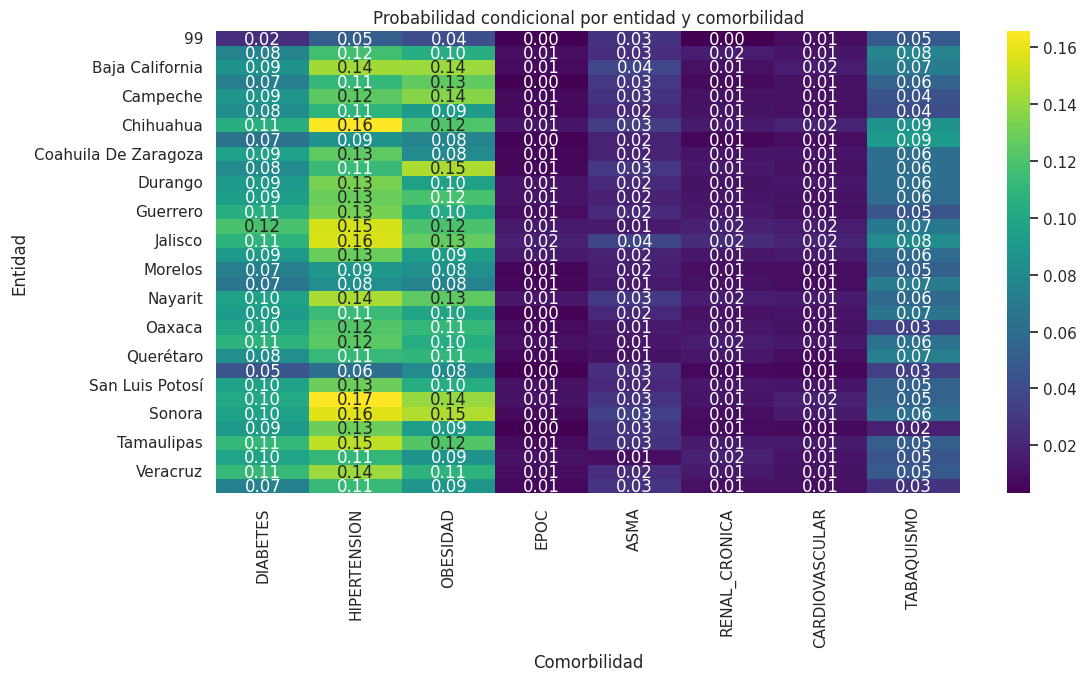

In [ ]:
# ejemplo: mostrar prob_cond en mapa de calor
if 'prob_cond' in globals():
    prob_cond_plot = prob_cond.fillna(0)
    plt.figure(figsize=(12,6))
    sns.heatmap(prob_cond_plot.loc[prob_cond_plot.index[:32]], annot=True, fmt='.2f', cmap='viridis')
    plt.title('Probabilidad condicional por entidad y comorbilidad')
    plt.xlabel('Comorbilidad')
    plt.ylabel('Entidad')
    plt.show()
else:
    print('No hay prob_cond calculada aún.')

In [ ]:
#ejercio de distribucion normal
from scipy.stats import norm
mu = 2360
sigma = 714
p = norm.cdf(3000, mu, sigma) - norm.cdf(2000, mu, sigma)

print("Probabilidad de que un estado tenga entre 2000 y 3000 casos positivos:")
print(f"{p:.4f}  →  {p*100:.2f}%")

Probabilidad de que un estado tenga entre 2000 y 3000 casos positivos:
0.5079  →  50.79%


## Interpretación de Resultados

Después de analizar la base de datos de COVID-19 en México, se pueden observar varias cosas importantes. Primero, la distribución de casos por entidad muestra que los estados con mayor población y movimiento urbano tienden a registrar más casos, lo cual es lógico porque concentran más personas y mayor contacto diario. Esto no siempre significa que sean los estados “más graves”, sino solo que tienen más habitantes.

En cuanto a las comorbilidades, se nota que diabetes, hipertensión y obesidad aparecen con más frecuencia. Estas enfermedades suelen ser comunes en la población mexicana, por lo que no nos sorprende que también estén presentes en muchos casos positivos. Lo importante es que estas comorbilidades están relacionadas con mayor riesgo de complicaciones, así que su análisis es necesario.

Sobre los tipos de pacientes, la mayoría aparece como ambulatorios, lo cual indica que no todos los casos positivos llegaron a necesitar hospitalización. Sin embargo, el porcentaje hospitalizado también es significativo y muestra que sí hubo casos graves.

El análisis por fechas deja ver que las curvas de ingreso tienen picos muy marcados. Esos picos representan momentos donde hubo más contagios, lo que coincide con las olas de COVID que se vivieron en el 2020 y 2021. La columna FECHA_DEF se dejó como estaba en la base (“9999-99-99”), así estaban registrados en los datos originales, lo cual nos dice que el paciente no falleció o no había información disponible.

Finalmente, el análisis estadístico y los gráficos nos ayudan a entender mejor el comportamiento de la pandemia en México. Los datos confirman tendencias que se vivieron en la vida real, pero también muestran la importancia de registrar bien la información para que sea útil y confiable.


### Conclusión — Marcela Perez Gurrola

En esta materia aprendí que la estadística no solo son fórmulas o tablas, son una herramienta útil para entender situaciones reales, como lo que pasó con el COVID-19. También me parece que trabajar con Python hace que todo sea más rápido, porque en lugar de hacer cálculos manuales, el programa puede analizar miles de datos en segundos. Al principio se me complicaba entender cómo organizar la información, pero con la práctica pude generar gráficas, limpiar datos y sacar conclusiones. Esta experiencia me ayudó a mejorar mi forma de trabajar con datos y me dejó más confianza para seguir aprendiendo programación. Ademas puedo agregar tambien que, me parecio excelente la forma de trabajarlo ya que se nos facilito mas aprender a programar en python usando la misma herramienta en dos materias, en pye se me hizo muy interesante una materia que realmente para mi no lo era tanto.


### Conclusión — Leonel Alberto Ontiveros Vera

Algo que me llevo de esta la materia es que Python facilita muchísimo el análisis estadístico. Aprendí a usar librerías que antes ni conocía, como pandas y matplotlib, y ahora entiendo cómo sirven para manejar bases de datos grandes. Me gustó ver cómo los números empiezan a tener sentido cuando los ponemos en gráficos, porque así se entiende mejor lo que está pasando. Trabajar con datos reales del COVID-19 también me hizo ver la importancia de la estadística en temas de salud. Esta práctica me ayudó a ver que la programación no solo es código, sino también una forma de interpretar el mundo, y que la probabilidad es una herramienta muy util en el area de programación.


### Conclusión — Edgar Giovanni Tinoco Nava

Durante la materia descubrí que la estadística aplicada es más interesante cuando se usan herramientas como Python. Al principio pensé que iba a ser complicado, pero las instrucciones y la práctica me ayudaron a entender cómo leer, filtrar y graficar datos. Me sorprendió lo rápido que se pueden obtener resultados que, de manera manual, tardarían muchísimo tiempo. Usar datos reales fue una buena experiencia porque pude ver cómo se comportan las variables en un caso real. En general, aprendí bastante y considero que esta experiencia me será útil en otras materias y proyectos.
